## Experimenting with different clustering models and dimension reductionality techniques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import silhouette_score as sil_score_metric
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
from umap import UMAP
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.cluster import MeanShift



In [3]:
df = pd.read_csv('Mall_Customers.csv')

## Pre processing

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pre processing that needs to be done: 

1)Encode the Gender column (one hot encoding)

2)Drop the customer id column

In [5]:
df = pd.get_dummies(df, columns=['Gender'])

In [6]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [7]:
df.drop(columns='CustomerID', inplace=True)

df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


## K-Means Clustering

The **Elbow Method** to find the **Optimal Number of Clusters**

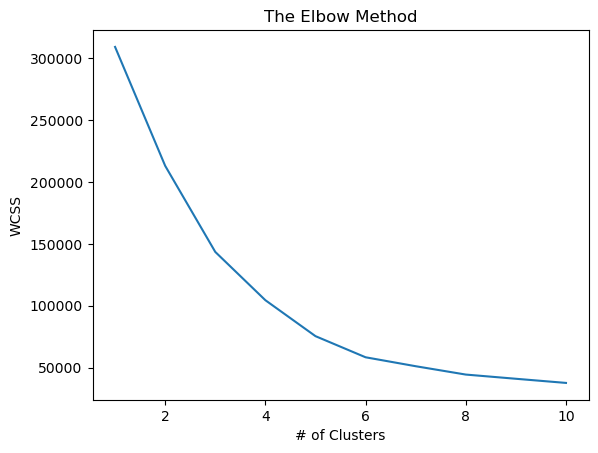

In [8]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS');


### K-Means with [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)

**Initializing** the **PCA Object** and **Reduces** the **Dimensions** of the DF

In [9]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

**Initializes** the **KMeans Object** and then Performs **Clustering** 

In [10]:
kmeans_pca = KMeans(n_clusters=6)
kmeans_pca.fit(pca_data)

KMeans(n_clusters=6)

**Scatterplot** showing the **Clusters**

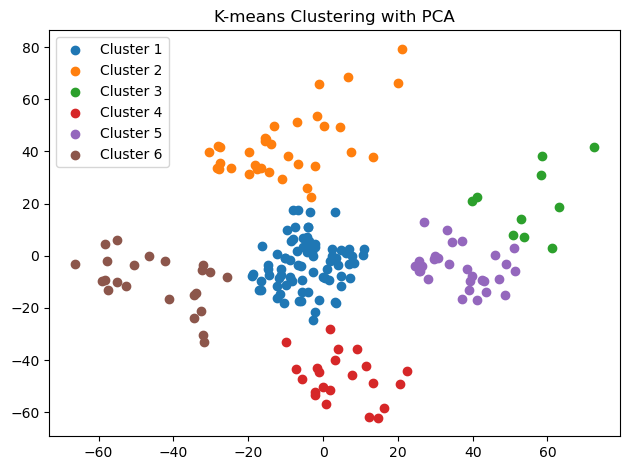

In [11]:
for cluster_label in range(6):
    cluster_indices = np.where(kmeans_pca.labels_ == cluster_label)
    plt.scatter(pca_data[cluster_indices, 0], pca_data[cluster_indices, 1])

plt.title('K-means Clustering with PCA')
plt.legend([f'Cluster {cluster_label+1}' for cluster_label in range(6)])
plt.tight_layout()


**Assigning** Each **Data Point** to a **Cluster** and Calculating [Silhouette](https://en.wikipedia.org/wiki/Silhouette_(clustering)) and [Calinski Harabasz](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index) Scores

In [12]:
labels_pca = kmeans_pca.fit_predict(pca_data)
silhouette_pca = silhouette_score(pca_data, labels_pca)
ch_pca = calinski_harabasz_score(pca_data, labels_pca)


Printing Out the **Calculated Scores**

In [13]:
print("Silhouette Scores:")
print("PCA:", silhouette_pca)
print("\nCalinski-Harabasz Index:")
print("PCA:", ch_pca)

Silhouette Scores:
PCA: 0.5364315096232991

Calinski-Harabasz Index:
PCA: 243.4554482184861


Creating a New Column that shows the Calculated Segment for Kmeans PCA 

In [14]:
df['kmeans_pca_Segment'] = kmeans_pca.labels_

df.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment
0,19,15,39,0,1,3
1,21,15,81,0,1,5
2,20,16,6,1,0,3
3,23,16,77,1,0,5
4,31,17,40,1,0,3


### K-Means with [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)

**Initializing** the **t-SNE** Object 

In [15]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(df)

**Initializes** the **KMeans Object** and then Performs **Clustering** 

In [16]:
kmeans_tsne = KMeans(n_clusters=6)
kmeans_tsne.fit(tsne_data)

KMeans(n_clusters=6)

**Scatterplot** showing the **Clusters**

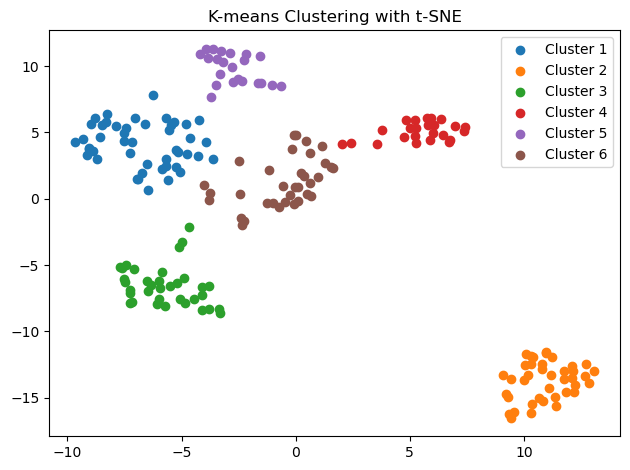

In [17]:
for cluster_label in range(6):
    cluster_indices = np.where(kmeans_tsne.labels_ == cluster_label)
    plt.scatter(tsne_data[cluster_indices, 0], tsne_data[cluster_indices, 1])

plt.title('K-means Clustering with t-SNE')
plt.legend([f'Cluster {cluster_label+1}' for cluster_label in range(6)])
plt.tight_layout()


**Assigning** Each **Data Point** to a **Cluster** and Calculating [Silhouette](https://en.wikipedia.org/wiki/Silhouette_(clustering)) and [Calinski Harabasz](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index) Scores

In [18]:
labels_tsne = kmeans_tsne.fit_predict(tsne_data)
silhouette_tsne = silhouette_score(tsne_data, labels_tsne)
ch_tsne = calinski_harabasz_score(tsne_data, labels_tsne)


Printing Out the **Calculated Scores**

In [19]:
print("Silhouette Scores:")
print("t-SNE:", silhouette_tsne)

print("\nCalinski-Harabasz Index:")
print("t-SNE:", ch_tsne)


Silhouette Scores:
t-SNE: 0.6621721

Calinski-Harabasz Index:
t-SNE: 1021.2419474077199


Creating a New Column that shows the Calculated Segment for Kmeans t-SNE 

In [20]:
df['kmeans_tsne_Segment'] = kmeans_tsne.labels_

df.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment
0,19,15,39,0,1,3,4
1,21,15,81,0,1,5,0
2,20,16,6,1,0,3,4
3,23,16,77,1,0,5,0
4,31,17,40,1,0,3,4


### K-Means with [UMAP](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html) 

**Initializing** the **UMAP** Object 

In [21]:
umap = UMAP(n_components=2)
umap_data = umap.fit_transform(df)

**Initializes** the **KMeans Object** and then Performs **Clustering** 

In [22]:
kmeans_umap = KMeans(n_clusters=6)
kmeans_umap.fit(umap_data)

KMeans(n_clusters=6)

**Scatterplot** showing the **Clusters**

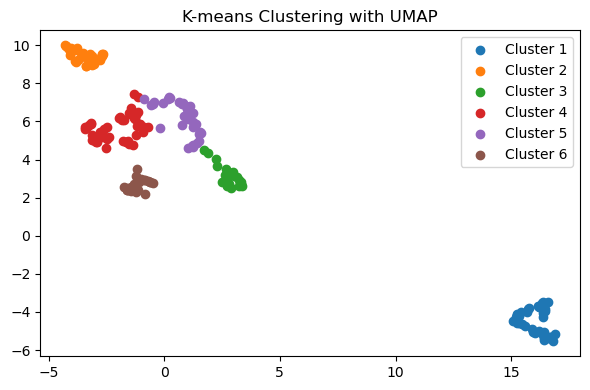

In [23]:
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in range(6):
    cluster_indices = np.where(kmeans_umap.labels_ == cluster_label)
    plt.scatter(umap_data[cluster_indices, 0], umap_data[cluster_indices, 1], label=f'Cluster {cluster_label+1}')

plt.title('K-means Clustering with UMAP')
plt.legend(loc='upper right')
plt.tight_layout()

**Assigning** Each **Data Point** to a **Cluster** and Calculating [Silhouette](https://en.wikipedia.org/wiki/Silhouette_(clustering)) and [Calinski Harabasz](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index) Scores

In [24]:
labels_umap = kmeans_umap.fit_predict(umap_data)
silhouette_umap = silhouette_score(umap_data, labels_umap)
ch_umap = calinski_harabasz_score(umap_data, labels_umap)


Printing Out the **Calculated Scores**

In [25]:
print("Silhouette Scores:")
print("UMAP:", silhouette_umap)

print("\nCalinski-Harabasz Index:")
print("UMAP:", ch_umap)


Silhouette Scores:
UMAP: 0.69301

Calinski-Harabasz Index:
UMAP: 3561.2696357212294


Creating a New Column that shows the Calculated Segment for Kmeans UMAP

In [26]:
df['kmeans_umap_Segment'] = kmeans_umap.labels_

df.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment
0,19,15,39,0,1,3,4,4
1,21,15,81,0,1,5,0,2
2,20,16,6,1,0,3,4,4
3,23,16,77,1,0,5,0,2
4,31,17,40,1,0,3,4,4


## Hierarchical Clustering 

Creating a **Dendrogram** to Calculate the **Optimal Number of Clusters**

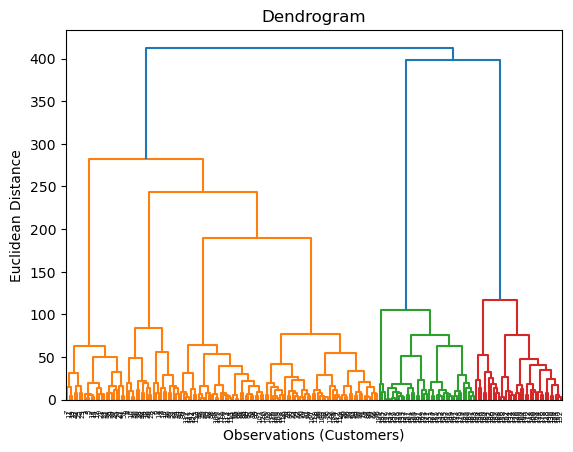

In [27]:
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Observations (Customers)')
plt.ylabel('Euclidean Distance');

### Hierarchical Clustering with **PCA**

Calculating the Optimal Values for the **Affinity and Linkage** Hyperparameters

In [28]:
# Perform PCA on the data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

# Define the range of values for affinities and linkages
affinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['complete', 'average', 'single']

# Perform clustering for each combination of affinity and linkage
results = []
best_calinski_score = -1
best_affinity_calinski = None
best_linkage_calinski = None

for affinity in affinities:
    if affinity == 'euclidean':
        linkages_to_try = linkages + ['ward']
    else:
        linkages_to_try = linkages
    for linkage in linkages_to_try:
        hc = AgglomerativeClustering(n_clusters=6, affinity=affinity, linkage=linkage)
        labels = hc.fit_predict(pca_data)
        ch_score = calinski_harabasz_score(pca_data, labels)
        results.append({'affinity': affinity, 'linkage': linkage, 'calinski_harabasz_score': ch_score})
        
        
        # Check if current combination has the highest Calinski-Harabasz score
        if ch_score > best_calinski_score:
            best_calinski_score = ch_score
            best_affinity_calinski = affinity
            best_linkage_calinski = linkage

# Print the results
for result in results:
    print(f"Affinity: {result['affinity']}, Linkage: {result['linkage']}, Calinski-Harabasz Score: {result['calinski_harabasz_score']}")

print(f"\nBest Calinski-Harabasz Score: {best_calinski_score}, Affinity: {best_affinity_calinski}, Linkage: {best_linkage_calinski}")


Affinity: euclidean, Linkage: complete, Calinski-Harabasz Score: 219.07997539011052
Affinity: euclidean, Linkage: average, Calinski-Harabasz Score: 228.4560036400704
Affinity: euclidean, Linkage: single, Calinski-Harabasz Score: 23.32109516251522
Affinity: euclidean, Linkage: ward, Calinski-Harabasz Score: 232.7131765800012
Affinity: l1, Linkage: complete, Calinski-Harabasz Score: 111.72238112371105
Affinity: l1, Linkage: average, Calinski-Harabasz Score: 123.96797929061208
Affinity: l1, Linkage: single, Calinski-Harabasz Score: 23.32109516251522
Affinity: l2, Linkage: complete, Calinski-Harabasz Score: 219.07997539011052
Affinity: l2, Linkage: average, Calinski-Harabasz Score: 228.4560036400704
Affinity: l2, Linkage: single, Calinski-Harabasz Score: 23.32109516251522
Affinity: manhattan, Linkage: complete, Calinski-Harabasz Score: 111.72238112371105
Affinity: manhattan, Linkage: average, Calinski-Harabasz Score: 123.96797929061208
Affinity: manhattan, Linkage: single, Calinski-Harabas

In this file, I have been calculating *Silhouette* and *Calinski Harabasz* scores to determine the effectiveness of each model. I had to decide which score was going to be measured in order to determine the hyperparamters. I chose the Calinski Harabasz Score over the Silhouette Score because the Calinski Score measures the distinctness and separateness of the individual clusters. Silhouette Scores focuses on the similarity of each individual data point in its cluster. For the purposes of this project, I want to create high-level customer segments that a Marketing Team could then strategize for. It is more important for me to create distinct clusters, so I used the Calinski Harabasz Score to decide the hyperparameters.

Performing **PCA Analyisi** to Reduce Dimensionality 

In [29]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

**Initialize** and **Run** the Model

In [30]:
hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data)


**Scatterplot** showing the **Clusters**

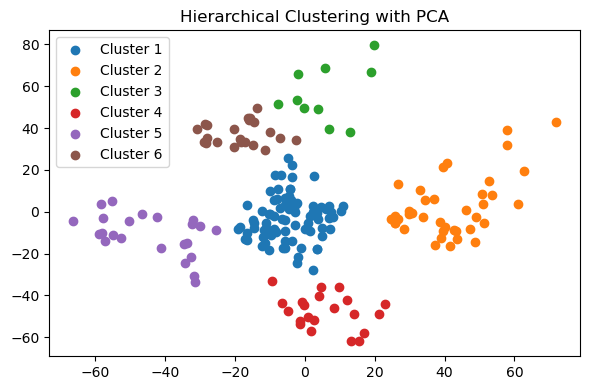

In [31]:
# Plot the clusters
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in range(6):
    cluster_indices = np.where(y_hc == cluster_label)
    plt.scatter(pca_data[cluster_indices, 0], pca_data[cluster_indices, 1], label=f'Cluster {cluster_label+1}')

plt.title('Hierarchical Clustering with PCA')
plt.legend(loc='upper left')
plt.tight_layout()


Calculating **Silhouette and Calinksi Harabasz** Scores

In [32]:
# Calculate Silhouette Score
silhouette_score = silhouette_score(pca_data, y_hc)
print("Silhouette Score:", silhouette_score)

# Calculate Calinski-Harabasz Score
calinski_score = calinski_harabasz_score(pca_data, y_hc)
print("Calinski-Harabasz Score:", calinski_score)


Silhouette Score: 0.5341600115841181
Calinski-Harabasz Score: 232.7131765800012


Adding the **Calculated Segments** to the DF

In [33]:
hierarchical_pca_labels = hc.fit_predict(df)

# Add the cluster labels as a new column in the DataFrame
df['hierarchical_pca_Segment'] = hierarchical_pca_labels
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment
0,19,15,39,0,1,3,4,4,1
1,21,15,81,0,1,5,0,2,3
2,20,16,6,1,0,3,4,4,1
3,23,16,77,1,0,5,0,2,3
4,31,17,40,1,0,3,4,4,1


### Hierarchical Clustering with **t-SNE**

Calculating the Optimal Values for the **Affinity and Linkage** Hyperparameters

In [34]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(df)

# Define the range of values for affinities and linkages
affinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['complete', 'average', 'single']

# Perform clustering for each combination of affinity and linkage
results = []
best_calinski_score = -1
best_affinity_calinski = None
best_linkage_calinski = None

for affinity in affinities:
    if affinity == 'euclidean':
        linkages_to_try = linkages + ['ward']
    else:
        linkages_to_try = linkages
    for linkage in linkages_to_try:
        hc = AgglomerativeClustering(n_clusters=6, affinity=affinity, linkage=linkage)
        labels = hc.fit_predict(tsne_data)
        ch_score = calinski_harabasz_score(tsne_data, labels)
        results.append({'affinity': affinity, 'linkage': linkage, 'calinski_harabasz_score': ch_score})
        
        
        # Check if current combination has the highest Calinski-Harabasz score
        if ch_score > best_calinski_score:
            best_calinski_score = ch_score
            best_affinity_calinski = affinity
            best_linkage_calinski = linkage

# Print the results
for result in results:
    print(f"Affinity: {result['affinity']}, Linkage: {result['linkage']}, Calinski-Harabasz Score: {result['calinski_harabasz_score']}")

print(f"\nBest Calinski-Harabasz Score: {best_calinski_score}, Affinity: {best_affinity_calinski}, Linkage: {best_linkage_calinski}")


Affinity: euclidean, Linkage: complete, Calinski-Harabasz Score: 1204.5119546388507
Affinity: euclidean, Linkage: average, Calinski-Harabasz Score: 1204.5119546388507
Affinity: euclidean, Linkage: single, Calinski-Harabasz Score: 235.38508375689256
Affinity: euclidean, Linkage: ward, Calinski-Harabasz Score: 1204.5119546388507
Affinity: l1, Linkage: complete, Calinski-Harabasz Score: 1204.5119546388507
Affinity: l1, Linkage: average, Calinski-Harabasz Score: 1204.5119546388507
Affinity: l1, Linkage: single, Calinski-Harabasz Score: 235.38508375689256
Affinity: l2, Linkage: complete, Calinski-Harabasz Score: 1204.5119546388507
Affinity: l2, Linkage: average, Calinski-Harabasz Score: 1204.5119546388507
Affinity: l2, Linkage: single, Calinski-Harabasz Score: 235.38508375689256
Affinity: manhattan, Linkage: complete, Calinski-Harabasz Score: 1204.5119546388507
Affinity: manhattan, Linkage: average, Calinski-Harabasz Score: 1204.5119546388507
Affinity: manhattan, Linkage: single, Calinski-H

Performing **Dimension Reductionality** on the DF using **t-SNE**

In [35]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(df)

**Initializing** and **Running** the Model with the **Calculated** Hyperparameters

In [39]:
hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
y_hc = hc.fit_predict(tsne_data)

Plotting the **Clusters**

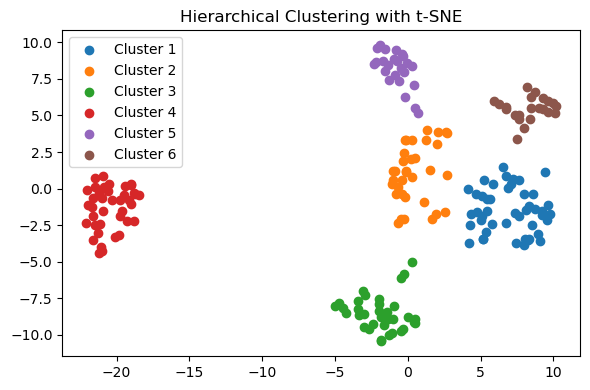

In [41]:
# Plot the clusters
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in range(6):
    cluster_indices = np.where(y_hc == cluster_label)
    plt.scatter(tsne_data[cluster_indices, 0], tsne_data[cluster_indices, 1], label=f'Cluster {cluster_label+1}')

plt.title('Hierarchical Clustering with t-SNE')
plt.legend(loc='upper left')
plt.tight_layout()


Calculating **Metrics**

In [43]:
# Calculate Silhouette Score
sil = silhouette_score(tsne_data, y_hc)
print("Silhouette Score:", sil)

# Calculate Calinski-Harabasz Score
calinski_score = calinski_harabasz_score(tsne_data, y_hc)
print("Calinski-Harabasz Score:", calinski_score)


Silhouette Score: 0.68081635
Calinski-Harabasz Score: 1231.2338351573926


Adding the Newly Calculated **Segment** to the DF

In [44]:
hierarchical_tsne_labels = hc.fit_predict(df)

# Add the cluster labels as a new column in the DataFrame
df['hierarchical_tsne_Segment'] = hierarchical_tsne_labels
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment
0,19,15,39,0,1,3,4,4,1,4
1,21,15,81,0,1,5,0,2,3,3
2,20,16,6,1,0,3,4,4,1,4
3,23,16,77,1,0,5,0,2,3,3
4,31,17,40,1,0,3,4,4,1,4


### Hierarchical Clustering with **UMAP**

Calculating the Optimal Values for the **Affinity and Linkage** Hyperparameters

In [45]:
umap = UMAP(n_components=2)
umap_data = umap.fit_transform(df)

# Define the range of values for affinities and linkages
affinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['complete', 'average', 'single']

# Perform clustering for each combination of affinity and linkage
results = []
best_calinski_score = -1
best_affinity_calinski = None
best_linkage_calinski = None

for affinity in affinities:
    if affinity == 'euclidean':
        linkages_to_try = linkages + ['ward']
    else:
        linkages_to_try = linkages
    for linkage in linkages_to_try:
        hc = AgglomerativeClustering(n_clusters=6, affinity=affinity, linkage=linkage)
        labels = hc.fit_predict(umap_data)
        ch_score = calinski_harabasz_score(umap_data, labels)
        results.append({'affinity': affinity, 'linkage': linkage, 'calinski_harabasz_score': ch_score})
        
        
        # Check if current combination has the highest Calinski-Harabasz score
        if ch_score > best_calinski_score:
            best_calinski_score = ch_score
            best_affinity_calinski = affinity
            best_linkage_calinski = linkage

# Print the results
for result in results:
    print(f"Affinity: {result['affinity']}, Linkage: {result['linkage']}, Calinski-Harabasz Score: {result['calinski_harabasz_score']}")

print(f"\nBest Calinski-Harabasz Score: {best_calinski_score}, Affinity: {best_affinity_calinski}, Linkage: {best_linkage_calinski}")


Affinity: euclidean, Linkage: complete, Calinski-Harabasz Score: 3911.252736660026
Affinity: euclidean, Linkage: average, Calinski-Harabasz Score: 4400.901507666082
Affinity: euclidean, Linkage: single, Calinski-Harabasz Score: 3136.0012846172813
Affinity: euclidean, Linkage: ward, Calinski-Harabasz Score: 4400.901507666082
Affinity: l1, Linkage: complete, Calinski-Harabasz Score: 3949.930872904205
Affinity: l1, Linkage: average, Calinski-Harabasz Score: 4502.275027997274
Affinity: l1, Linkage: single, Calinski-Harabasz Score: 3136.0012846172813
Affinity: l2, Linkage: complete, Calinski-Harabasz Score: 3911.252736660026
Affinity: l2, Linkage: average, Calinski-Harabasz Score: 4400.901507666082
Affinity: l2, Linkage: single, Calinski-Harabasz Score: 3136.0012846172813
Affinity: manhattan, Linkage: complete, Calinski-Harabasz Score: 3949.930872904205
Affinity: manhattan, Linkage: average, Calinski-Harabasz Score: 4502.275027997274
Affinity: manhattan, Linkage: single, Calinski-Harabasz S

Performing **Dimension Reductionality** on the DF using **UMAP**

In [46]:
umap = UMAP(n_components=2)
umap_data = umap.fit_transform(df)

**Initializing** and **Running** the Model with the **Calculated** Hyperparameters

In [47]:
hc = AgglomerativeClustering(n_clusters=6, affinity='l1', linkage='average')
y_hc = hc.fit_predict(umap_data)

Plotting the **Clusters**

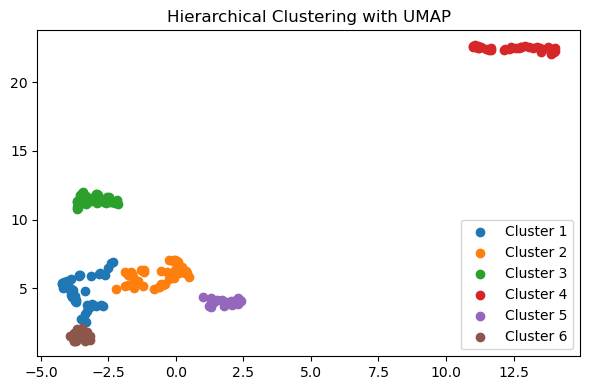

In [48]:
# Plot the clusters
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in range(6):
    cluster_indices = np.where(y_hc == cluster_label)
    plt.scatter(umap_data[cluster_indices, 0], umap_data[cluster_indices, 1], label=f'Cluster {cluster_label+1}')

plt.title('Hierarchical Clustering with UMAP')
plt.legend(loc='lower right')
plt.tight_layout()


Calculating **Metrics**

In [49]:
# Calculate Silhouette Score
sil = silhouette_score(umap_data, y_hc)
print("Silhouette Score:", sil)

# Calculate Calinski-Harabasz Score
calinski_score = calinski_harabasz_score(umap_data, y_hc)
print("Calinski-Harabasz Score:", calinski_score)


Silhouette Score: 0.6939256
Calinski-Harabasz Score: 3873.875352516379


Adding the Newly Calculated **Segment** to the DF

In [50]:
hierarchical_umap_labels = hc.fit_predict(df)

# Add the cluster labels as a new column in the DataFrame
df['hierarchical_umap_Segment'] = hierarchical_umap_labels
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,hierarchical_umap_Segment
0,19,15,39,0,1,3,4,4,1,4,3
1,21,15,81,0,1,5,0,2,3,3,4
2,20,16,6,1,0,3,4,4,1,4,3
3,23,16,77,1,0,5,0,2,3,3,4
4,31,17,40,1,0,3,4,4,1,4,3


## DBSCAN

Calculating the **Optimal Hyperparameters** for each **Dimension Reductionality** Techniques

In [168]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Perform dimensionality reduction with t-SNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(scaled_data)

# Perform dimensionality reduction with UMAP
umap = UMAP(n_components=2)
umap_data = umap.fit_transform(scaled_data)

# Define the range of values for eps and min_samples
eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = range(2, 10)

# Grid search for optimal eps and min_samples for each technique
best_eps_pca = None
best_min_samples_pca = None
best_eps_tsne = None
best_min_samples_tsne = None
best_eps_umap = None
best_min_samples_umap = None
best_calinski_score_pca = -1
best_calinski_score_tsne = -1
best_calinski_score_umap = -1


# Calculating optimal hyperparameters in PCA
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan_pca = DBSCAN(eps=eps, min_samples=min_samples)
        labels_pca = dbscan_pca.fit_predict(pca_data)
        n_clusters_pca = len(set(labels_pca)) - (1 if -1 in labels_pca else 0)
        if n_clusters_pca > 1:
            calinski_score_pca = calinski_harabasz_score(pca_data, labels_pca)
            if calinski_score_pca > best_calinski_score_pca:
                best_calinski_score_pca = calinski_score_pca
                best_eps_pca = eps
                best_min_samples_pca = min_samples

print("Optimal parameters for DBSCAN with PCA:")
print("eps:", best_eps_pca)
print("min_samples:", best_min_samples_pca)
print("Calinski-Harabasz score:", best_calinski_score_pca)

# Perform the same grid search for t-SNE 
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan_tsne = DBSCAN(eps=eps, min_samples=min_samples)
        labels_tsne = dbscan_tsne.fit_predict(tsne_data)
        n_clusters_tsne = len(set(labels_tsne)) - (1 if -1 in labels_tsne else 0)
        if n_clusters_tsne > 1:
            calinski_score_tsne = calinski_harabasz_score(tsne_data, labels_tsne)
            if calinski_score_tsne > best_calinski_score_tsne:
                best_calinski_score_tsne = calinski_score_tsne
                best_eps_tsne = eps
                best_min_samples_tsne = min_samples


print("\nOptimal parameters for DBSCAN with t-SNE:")
print("eps:", best_eps_tsne)
print("min_samples:", best_min_samples_tsne)
print("Calinski-Harabasz score:", best_calinski_score_tsne)

# Perform the same grid search for UMAP
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan_umap = DBSCAN(eps=eps, min_samples=min_samples)
        labels_umap = dbscan_umap.fit_predict(umap_data)
        n_clusters_umap = len(set(labels_umap)) - (1 if -1 in labels_umap else 0)
        if n_clusters_umap > 1:
            calinski_score_umap = calinski_harabasz_score(umap_data, labels_umap)
            if calinski_score_umap > best_calinski_score_umap:
                best_calinski_score_umap = calinski_score_umap
                best_eps_umap = eps
                best_min_samples_umap = min_samples


print("\nOptimal parameters for DBSCAN with UMAP:")
print("eps:", best_eps_umap)
print("min_samples:", best_min_samples_umap)
print("Calinski-Harabasz score:", best_calinski_score_umap)

Optimal parameters for DBSCAN with PCA:
eps: 0.6000000000000001
min_samples: 2
Calinski-Harabasz score: 970.8030165011551

Optimal parameters for DBSCAN with t-SNE:
eps: 0.9
min_samples: 2
Calinski-Harabasz score: 6362.758667468301

Optimal parameters for DBSCAN with UMAP:
eps: 0.2
min_samples: 2
Calinski-Harabasz score: 62671.16286952142


### DBSCAN with **PCA**

**Scaling** the Data

In [192]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

Perform Dimension Reductionality with **PCA**

In [197]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

Perform **DBSCAN clustering** on PCA data


In [203]:
dbscan_pca = DBSCAN(eps=0.6000000000000001, min_samples=2)
labels_pca = dbscan_pca.fit_predict(pca_data)

Plotting the **Clusters**

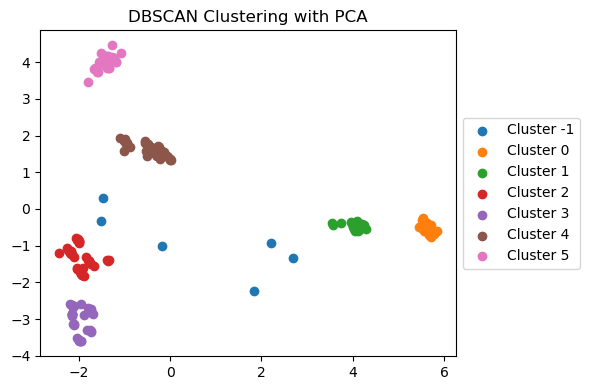

In [204]:
# Plot the clusters
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in np.unique(labels_pca):
    cluster_indices = np.where(labels_pca == cluster_label)
    plt.scatter(pca_data[cluster_indices, 0], pca_data[cluster_indices, 1], label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering with PCA')

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


Cluster = **-1** indicates that the algorithm couldn't assign it a cluster. Any data points in that cluster should be viewed as an **outlier**.

Calculating the **Metrics**

In [205]:
# Calculate the Silhouette score
silhouette = silhouette_score(pca_data, labels_pca)

# Calculate the Calinski-Harabasz score
calinski = calinski_harabasz_score(pca_data, labels_pca)

# Print the scores
print(f"Silhouette score: {silhouette}")
print(f"\nCalinski-Harabasz score: {calinski}")

Silhouette score: 0.7615995482092686

Calinski-Harabasz score: 1872.0143945781135


Adding the **Segment** Number to the DF

In [180]:
df['dbscan_pca_Segment'] = labels_pca
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,...,dbscan_umap_Segment,gmm_pca_Segment,gmm_tsne_Segment,gmm_umap_Segment,birch_pca_Segment,birch_tsne_Segment,birch_umap_Segment,mean_pca_Segment,mean_tsne_Segment,mean_umap_Segment
0,19,15,39,0,1,3,4,4,1,4,...,0,4,4,0,4,0,4,4,5,5
1,21,15,81,0,1,5,0,2,3,3,...,1,3,0,3,3,3,5,3,4,4
2,20,16,6,1,0,3,4,4,1,4,...,2,4,4,0,4,0,4,4,5,5
3,23,16,77,1,0,5,0,2,3,3,...,3,3,0,3,3,3,5,3,4,4
4,31,17,40,1,0,3,4,4,1,4,...,2,4,4,0,4,0,4,4,5,5


### DBSCAN with **t-SNE**

**Scaling** the Data

In [213]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

Performing Dimension Reductionality with **t-SNE**

In [214]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(scaled_data)

Perform **DBSCAN clustering** on t-SNE data


In [218]:
dbscan_tsne = DBSCAN(eps=0.9, min_samples=2)
labels_tsne = dbscan_tsne.fit_predict(tsne_data)

Plotting the **Clusters**

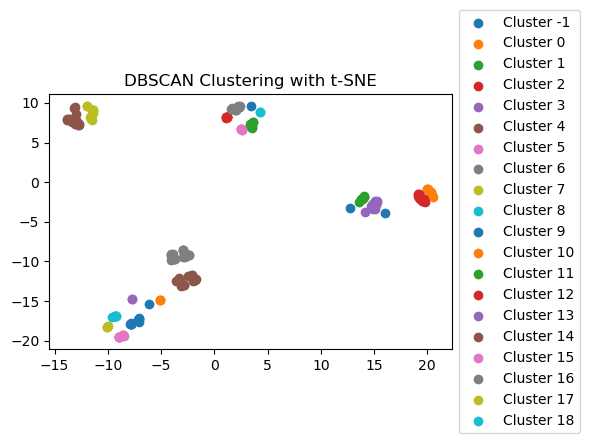

In [219]:
# Plot the clusters
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in np.unique(labels_tsne):
    cluster_indices = np.where(labels_tsne == cluster_label)
    plt.scatter(tsne_data[cluster_indices, 0], tsne_data[cluster_indices, 1], label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering with t-SNE')

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


Cluster = **-1** indicates that the algorithm couldn't assign it a cluster. Any data points in that cluster should be viewed as an **outlier**.

Calculating the **Metrics**

In [217]:
# Calculate the Silhouette score
silhouette = silhouette_score(tsne_data, labels_tsne)

# Calculate the Calinski-Harabasz score
calinski = calinski_harabasz_score(tsne_data, labels_tsne)

# Print the scores
print(f"Silhouette score: {silhouette}")
print(f"\nCalinski-Harabasz score: {calinski}")

Silhouette score: 0.6829977631568909

Calinski-Harabasz score: 601.3630425797178


Adding the **Segment Number** to the DF

In [179]:
df['dbscan_tsne_Segment'] = labels_tsne
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,...,dbscan_umap_Segment,gmm_pca_Segment,gmm_tsne_Segment,gmm_umap_Segment,birch_pca_Segment,birch_tsne_Segment,birch_umap_Segment,mean_pca_Segment,mean_tsne_Segment,mean_umap_Segment
0,19,15,39,0,1,3,4,4,1,4,...,0,4,4,0,4,0,4,4,5,5
1,21,15,81,0,1,5,0,2,3,3,...,1,3,0,3,3,3,5,3,4,4
2,20,16,6,1,0,3,4,4,1,4,...,2,4,4,0,4,0,4,4,5,5
3,23,16,77,1,0,5,0,2,3,3,...,3,3,0,3,3,3,5,3,4,4
4,31,17,40,1,0,3,4,4,1,4,...,2,4,4,0,4,0,4,4,5,5


### DBSCAN with **UMAP**

**Scaling** the Data

In [220]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

Performing Dimension Reductionality with **UMAP**

In [221]:
umap = UMAP(n_components=2)
umap_data = umap.fit_transform(scaled_data)

Perform **DBSCAN clustering** on UMAP data


In [222]:
dbscan_umap = DBSCAN(eps= 2, min_samples=2)
labels_umap = dbscan_umap.fit_predict(umap_data)

Plotting the **Clusters**

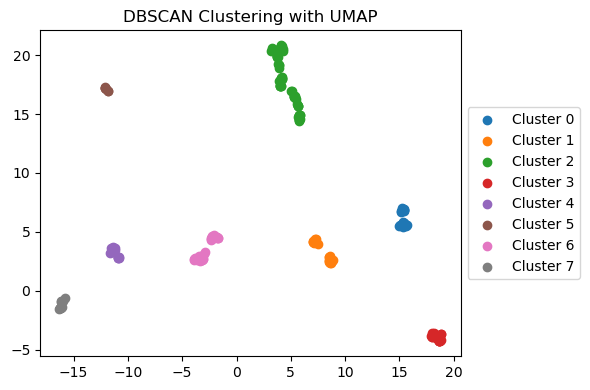

In [223]:
# Plot the clusters
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in np.unique(labels_umap):
    cluster_indices = np.where(labels_umap == cluster_label)
    plt.scatter(umap_data[cluster_indices, 0], umap_data[cluster_indices, 1], label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering with UMAP')

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


Calculating the **Metrics**

In [224]:
# Calculate the Silhouette score
silhouette = silhouette_score(umap_data, labels_umap)

# Calculate the Calinski-Harabasz score
calinski = calinski_harabasz_score(umap_data, labels_umap)

# Print the scores
print(f"Silhouette score: {silhouette}")
print(f"\nCalinski-Harabasz score: {calinski}")

Silhouette score: 0.8685304522514343

Calinski-Harabasz score: 2147.5721870506422


Adding the **Segment Number** to the DF

In [186]:
df['dbscan_umap_Segment'] = labels_umap
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,...,dbscan_umap_Segment,gmm_pca_Segment,gmm_tsne_Segment,gmm_umap_Segment,birch_pca_Segment,birch_tsne_Segment,birch_umap_Segment,mean_pca_Segment,mean_tsne_Segment,mean_umap_Segment
0,19,15,39,0,1,3,4,4,1,4,...,0,4,4,0,4,0,4,4,5,5
1,21,15,81,0,1,5,0,2,3,3,...,1,3,0,3,3,3,5,3,4,4
2,20,16,6,1,0,3,4,4,1,4,...,0,4,4,0,4,0,4,4,5,5
3,23,16,77,1,0,5,0,2,3,3,...,2,3,0,3,3,3,5,3,4,4
4,31,17,40,1,0,3,4,4,1,4,...,0,4,4,0,4,0,4,4,5,5


## Gaussian Mixture Model

Calculating the **Optimal Number** of Clusters by [BIC Scores](https://en.wikipedia.org/wiki/Bayesian_information_criterion)

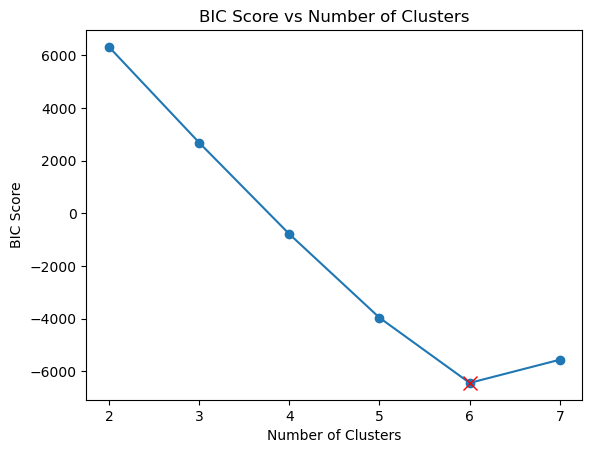

In [95]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Define the range of number of clusters to try
n_components_range = range(2,8)

# Fit GMM models with different number of components and compute BIC
bic_scores = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(df)
    bic_scores.append(gmm.bic(df))

# Plot the BIC scores
plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Score vs Number of Clusters')

# Find the minimum BIC score and its corresponding number of clusters
min_bic = np.min(bic_scores)
min_bic_index = np.argmin(bic_scores)
min_bic_clusters = n_components_range[min_bic_index]

# Highlight the minimum value with an 'x'
plt.plot(min_bic_clusters, min_bic, marker='x', markersize=10, color='red');

### GMM with **PCA**

Performing Dimension Reductionality with **PCA**

In [96]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

Perform **GMM** Clustering and Assigning **Labels**

In [97]:
gmm_pca = GaussianMixture(n_components=6)
gmm_pca.fit(pca_data)
labels_pca = gmm_pca.predict(pca_data)

Plotting the **Clusters**

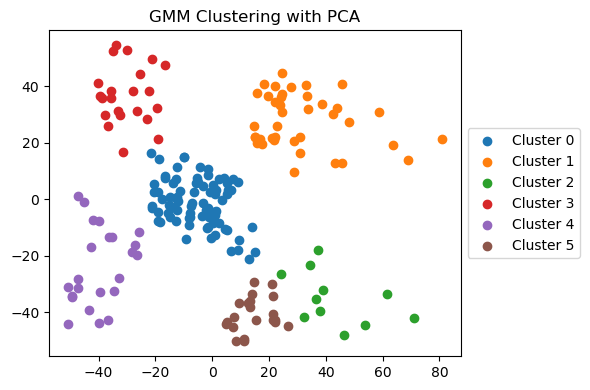

In [98]:
# Plot the clusters
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in np.unique(labels_pca):
    cluster_indices = np.where(labels_pca == cluster_label)
    plt.scatter(pca_data[cluster_indices, 0], pca_data[cluster_indices, 1], label=f'Cluster {cluster_label}')


plt.title('GMM Clustering with PCA');

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


Calculating the **Metrics**

In [99]:
# Calculate the Silhouette score
silhouette = silhouette_score(pca_data, labels_pca)

# Calculate the Calinski-Harabasz score
calinski = calinski_harabasz_score(pca_data, labels_pca)

# Print the scores
print(f"Silhouette score: {silhouette}")
print(f"\nCalinski-Harabasz score: {calinski}")

Silhouette score: 0.5393760596011853

Calinski-Harabasz score: 242.76352529968463


Adding the **Cluster** Column

In [100]:
df['gmm_pca_Segment'] = labels_pca
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,hierarchical_umap_Segment,dbscan_pca_Segment,dbscan_tsne_Segment,dbscan_umap_Segment,gmm_pca_Segment
0,19,15,39,0,1,3,4,4,1,4,3,0,0,0,4
1,21,15,81,0,1,5,0,2,3,3,4,4,1,1,3
2,20,16,6,1,0,3,4,4,1,4,3,1,2,2,4
3,23,16,77,1,0,5,0,2,3,3,4,2,3,3,3
4,31,17,40,1,0,3,4,4,1,4,3,1,2,2,4


### GMM with **t-SNE**

Performing Dimension Reductionality with **t-SNE**

In [101]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(df)

Perform **GMM** Clustering and Assigning **Labels**

In [102]:
gmm_tsne = GaussianMixture(n_components=6)
gmm_tsne.fit(tsne_data)
labels_tsne = gmm_tsne.predict(tsne_data)

Plotting the **Clusters**

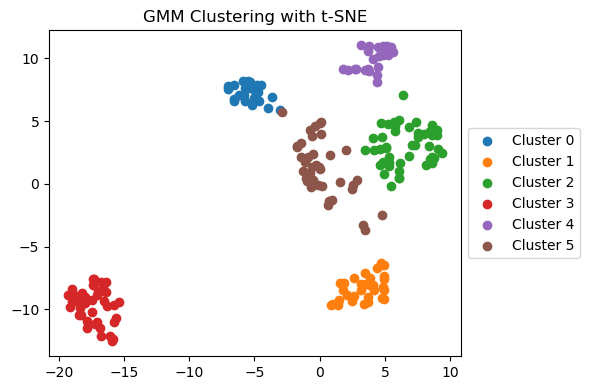

In [103]:
# Plot the clusters
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in np.unique(labels_tsne):
    cluster_indices = np.where(labels_tsne == cluster_label)
    plt.scatter(tsne_data[cluster_indices, 0], tsne_data[cluster_indices, 1], label=f'Cluster {cluster_label}')


plt.title('GMM Clustering with t-SNE');

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


Calculating **Metrics**

In [104]:
# Calculate the Silhouette score
silhouette = silhouette_score(tsne_data, labels_tsne)

# Calculate the Calinski-Harabasz score
calinski = calinski_harabasz_score(tsne_data, labels_tsne)

# Print the scores
print(f"Silhouette score: {silhouette}")
print(f"\nCalinski-Harabasz score: {calinski}")

Silhouette score: 0.6842346787452698

Calinski-Harabasz score: 1179.753525424784


Adding the **Cluster** Column

In [105]:
df['gmm_tsne_Segment'] = labels_tsne
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,hierarchical_umap_Segment,dbscan_pca_Segment,dbscan_tsne_Segment,dbscan_umap_Segment,gmm_pca_Segment,gmm_tsne_Segment
0,19,15,39,0,1,3,4,4,1,4,3,0,0,0,4,4
1,21,15,81,0,1,5,0,2,3,3,4,4,1,1,3,0
2,20,16,6,1,0,3,4,4,1,4,3,1,2,2,4,4
3,23,16,77,1,0,5,0,2,3,3,4,2,3,3,3,0
4,31,17,40,1,0,3,4,4,1,4,3,1,2,2,4,4


### GMM with **UMAP**

Performing Dimension Reductionality with **UMAP**

In [106]:
umap = UMAP(n_components=2)
umap_data = umap.fit_transform(df)

Perform **GMM** Clustering and Assigning **Labels**

In [107]:
gmm_umap = GaussianMixture(n_components=6)
gmm_umap.fit(umap_data)
labels_umap = gmm_umap.predict(umap_data)

Plotting the **Clusters**

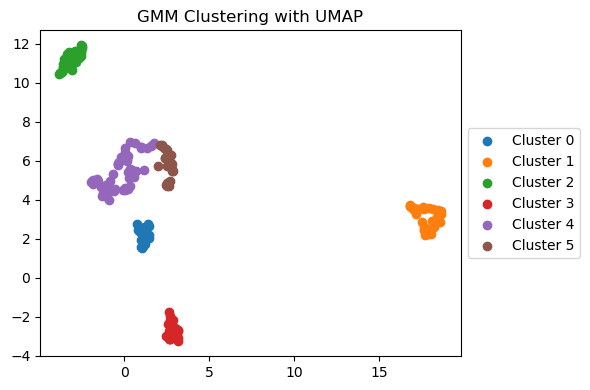

In [108]:
# Plot the clusters
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in np.unique(labels_umap):
    cluster_indices = np.where(labels_umap  == cluster_label)
    plt.scatter(umap_data[cluster_indices, 0], umap_data[cluster_indices, 1], label=f'Cluster {cluster_label}')


plt.title('GMM Clustering with UMAP');

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


Calculating **Metrics**

In [109]:
# Calculate the Silhouette score
silhouette = silhouette_score(umap_data, labels_umap)

# Calculate the Calinski-Harabasz score
calinski = calinski_harabasz_score(umap_data, labels_umap)

# Print the scores
print(f"Silhouette score: {silhouette}")
print(f"\nCalinski-Harabasz score: {calinski}")

Silhouette score: 0.7197554111480713

Calinski-Harabasz score: 3329.33580793517


Adding the **Cluster** Column

In [110]:
df['gmm_umap_Segment'] = labels_umap
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,hierarchical_umap_Segment,dbscan_pca_Segment,dbscan_tsne_Segment,dbscan_umap_Segment,gmm_pca_Segment,gmm_tsne_Segment,gmm_umap_Segment
0,19,15,39,0,1,3,4,4,1,4,3,0,0,0,4,4,0
1,21,15,81,0,1,5,0,2,3,3,4,4,1,1,3,0,3
2,20,16,6,1,0,3,4,4,1,4,3,1,2,2,4,4,0
3,23,16,77,1,0,5,0,2,3,3,4,2,3,3,3,0,3
4,31,17,40,1,0,3,4,4,1,4,3,1,2,2,4,4,0


## **Birch** Clustering 

### Birch with **PCA** 

Performing Dimension Reductionality with **PCA**

In [111]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

Calculating the Optimal **Number of Clusters** and **Threshold**

In [112]:
best_calinski_score = -1
best_n_clusters = None
best_threshold = None

for n_clusters in range(2, 10):
    for threshold in [0.2, 0.25,0.3,0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]:
        birch = Birch(n_clusters=n_clusters, threshold=threshold)
        labels = birch.fit_predict(pca_data)
        calinski_score = calinski_harabasz_score(pca_data, labels)
        
        if calinski_score > best_calinski_score:
            best_calinski_score = calinski_score
            best_n_clusters = n_clusters
            best_threshold = threshold

print("Best Calinski-Harabasz Score:", best_calinski_score)
print("Best Number of Clusters:", best_n_clusters)
print("Best Threshold:", best_threshold)

Best Calinski-Harabasz Score: 256.9875275411812
Best Number of Clusters: 5
Best Threshold: 0.2


Performing **Birch Clustering**

In [113]:
birch = Birch(n_clusters=5, threshold=0.2)
labels_pca = birch.fit_predict(pca_data)

Plotting the **Clusters**

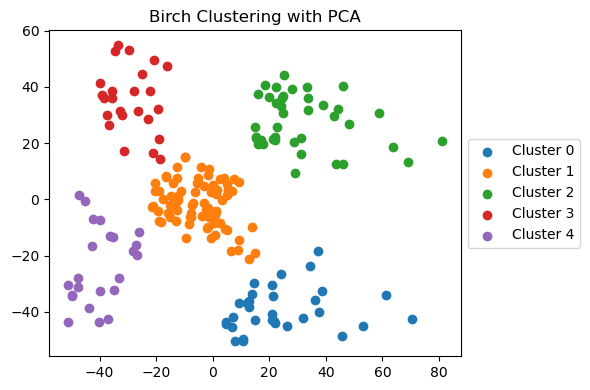

In [114]:
# Plot the clusters
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in np.unique(labels_pca):
    cluster_indices = np.where(labels_pca  == cluster_label)
    plt.scatter(pca_data[cluster_indices, 0], pca_data[cluster_indices, 1], label=f'Cluster {cluster_label}')


plt.title('Birch Clustering with PCA');

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


Calculating **Metrics**

In [115]:
silhouette = silhouette_score(pca_data, labels_pca)

calinski = calinski_harabasz_score(pca_data, labels_pca)

print(f"Silhouette score: {silhouette}")
print(f"\nCalinski-Harabasz score: {calinski}")

Silhouette score: 0.5565267887505376

Calinski-Harabasz score: 256.9875275411812


Adding the **Cluster** Column

In [116]:
df['birch_pca_Segment'] = labels_pca
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,hierarchical_umap_Segment,dbscan_pca_Segment,dbscan_tsne_Segment,dbscan_umap_Segment,gmm_pca_Segment,gmm_tsne_Segment,gmm_umap_Segment,birch_pca_Segment
0,19,15,39,0,1,3,4,4,1,4,3,0,0,0,4,4,0,4
1,21,15,81,0,1,5,0,2,3,3,4,4,1,1,3,0,3,3
2,20,16,6,1,0,3,4,4,1,4,3,1,2,2,4,4,0,4
3,23,16,77,1,0,5,0,2,3,3,4,2,3,3,3,0,3,3
4,31,17,40,1,0,3,4,4,1,4,3,1,2,2,4,4,0,4


### Birch with **t-SNE**

Performing Dimension Reductionality with **t-SNE**

In [117]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(df)

Calculating the Optimal **Number of Clusters** and **Threshold**

In [123]:
best_calinski_score = -1
best_n_clusters = None
best_threshold = None

for n_clusters in range(2, 10):
    for threshold in [0.2, 0.25,0.3,0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]:
        birch = Birch(n_clusters=n_clusters, threshold=threshold)
        labels = birch.fit_predict(tsne_data)
        calinski_score = calinski_harabasz_score(tsne_data, labels)
        
        if calinski_score > best_calinski_score:
            best_calinski_score = calinski_score
            best_n_clusters = n_clusters
            best_threshold = threshold

print("Best Calinski-Harabasz Score:", best_calinski_score)
print("Best Number of Clusters:", best_n_clusters)
print("Best Threshold:", best_threshold)

Best Calinski-Harabasz Score: 1350.823146108017
Best Number of Clusters: 8
Best Threshold: 0.3


Performing **Birch Clustering**

In [122]:
birch = Birch(n_clusters=8, threshold=0.3)
labels_tsne = birch.fit_predict(pca_data)


Plotting the **Clusters**

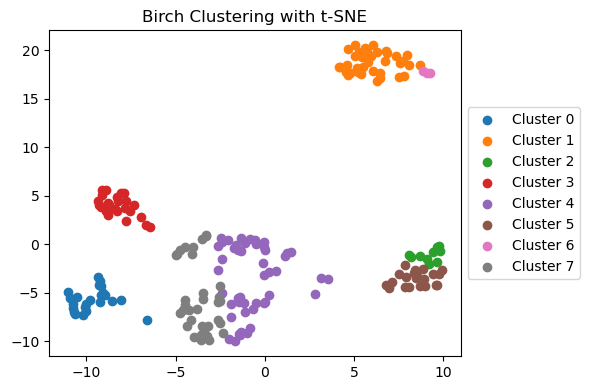

In [124]:
# Plot the clusters
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in np.unique(labels_tsne):
    cluster_indices = np.where(labels_tsne == cluster_label)
    plt.scatter(tsne_data[cluster_indices, 0], tsne_data[cluster_indices, 1], label=f'Cluster {cluster_label}')


plt.title('Birch Clustering with t-SNE');

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


Calculating **Metrics**

In [121]:
silhouette = silhouette_score(tsne_data, labels_tsne)

calinski = calinski_harabasz_score(tsne_data, labels_tsne)

print(f"Silhouette score: {silhouette}")
print(f"\nCalinski-Harabasz score: {calinski}")

Silhouette score: 0.398579865694046

Calinski-Harabasz score: 509.35424629325956


Adding the **Cluster** Column

In [125]:
df['birch_tsne_Segment'] = labels_tsne
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,hierarchical_umap_Segment,dbscan_pca_Segment,dbscan_tsne_Segment,dbscan_umap_Segment,gmm_pca_Segment,gmm_tsne_Segment,gmm_umap_Segment,birch_pca_Segment,birch_tsne_Segment
0,19,15,39,0,1,3,4,4,1,4,3,0,0,0,4,4,0,4,0
1,21,15,81,0,1,5,0,2,3,3,4,4,1,1,3,0,3,3,3
2,20,16,6,1,0,3,4,4,1,4,3,1,2,2,4,4,0,4,0
3,23,16,77,1,0,5,0,2,3,3,4,2,3,3,3,0,3,3,3
4,31,17,40,1,0,3,4,4,1,4,3,1,2,2,4,4,0,4,0


### Birch with **UMAP**

Performing Dimension Reductionality with **UMAP**

In [126]:
umap = UMAP(n_components=2)
umap_data = umap.fit_transform(df)

Calculating the Optimal **Number of Clusters** and **Threshold**

In [127]:
best_calinski_score = -1
best_n_clusters = None
best_threshold = None

for n_clusters in range(2, 10):
    for threshold in [0.2, 0.25,0.3,0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]:
        birch = Birch(n_clusters=n_clusters, threshold=threshold)
        labels = birch.fit_predict(umap_data)
        calinski_score = calinski_harabasz_score(umap_data, labels)
        
        if calinski_score > best_calinski_score:
            best_calinski_score = calinski_score
            best_n_clusters = n_clusters
            best_threshold = threshold

print("Best Calinski-Harabasz Score:", best_calinski_score)
print("Best Number of Clusters:", best_n_clusters)
print("Best Threshold:", best_threshold)

Best Calinski-Harabasz Score: 6863.350493258161
Best Number of Clusters: 9
Best Threshold: 0.55


Performing **Birch Clustering**

In [128]:
birch = Birch(n_clusters=9, threshold=0.55)
labels_umap = birch.fit_predict(umap_data)

Plotting the **Clusters**

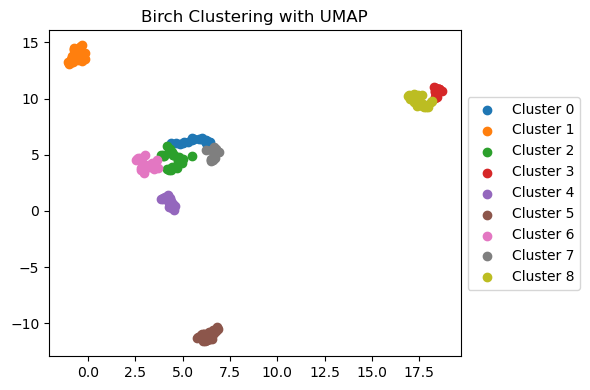

In [129]:
# Plot the clusters
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in np.unique(labels_umap):
    cluster_indices = np.where(labels_umap == cluster_label)
    plt.scatter(umap_data[cluster_indices, 0], umap_data[cluster_indices, 1], label=f'Cluster {cluster_label}')


plt.title('Birch Clustering with UMAP');

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


Calculating **Metrics**

In [130]:
silhouette = silhouette_score(umap_data, labels_umap)

calinski = calinski_harabasz_score(umap_data, labels_umap)

print(f"Silhouette score: {silhouette}")
print(f"\nCalinski-Harabasz score: {calinski}")

Silhouette score: 0.6645039916038513

Calinski-Harabasz score: 6863.350493258161


Adding the **Cluster** Column

In [131]:
df['birch_umap_Segment'] = labels_umap
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,hierarchical_umap_Segment,dbscan_pca_Segment,dbscan_tsne_Segment,dbscan_umap_Segment,gmm_pca_Segment,gmm_tsne_Segment,gmm_umap_Segment,birch_pca_Segment,birch_tsne_Segment,birch_umap_Segment
0,19,15,39,0,1,3,4,4,1,4,3,0,0,0,4,4,0,4,0,4
1,21,15,81,0,1,5,0,2,3,3,4,4,1,1,3,0,3,3,3,5
2,20,16,6,1,0,3,4,4,1,4,3,1,2,2,4,4,0,4,0,4
3,23,16,77,1,0,5,0,2,3,3,4,2,3,3,3,0,3,3,3,5
4,31,17,40,1,0,3,4,4,1,4,3,1,2,2,4,4,0,4,0,4


## **MeanShift** Clustering   

### MeanShift with **PCA**

Calculating the Optimal Value of **Bandwidth**

In [132]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

# Define the range of bandwidth values to try
bandwidth_range = np.arange(10,30,1)

# Initialize variables to store best results
best_bandwidth = None
best_score = -1

# Iterate over the bandwidth values and compute Calinski-Harabasz score
for bandwidth in bandwidth_range:
    ms = MeanShift(bandwidth=bandwidth)
    labels = ms.fit_predict(pca_data)
    score = calinski_harabasz_score(pca_data, labels)
    if score > best_score:
        best_score = score
        best_bandwidth = bandwidth

# Print the optimal bandwidth and the corresponding score
print("Optimal Bandwidth:", best_bandwidth)
print("Calinski-Harabasz Score:", best_score)


Optimal Bandwidth: 21
Calinski-Harabasz Score: 261.3175179393066


Performing Dimension Reductionality with **PCA**

In [133]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

Perform **MeanShift** Clustering 

In [134]:
# Perform MeanShift clustering
meanshift = MeanShift(bandwidth=21)
labels_pca = meanshift.fit_predict(pca_data)

Plotting the **Clusters**

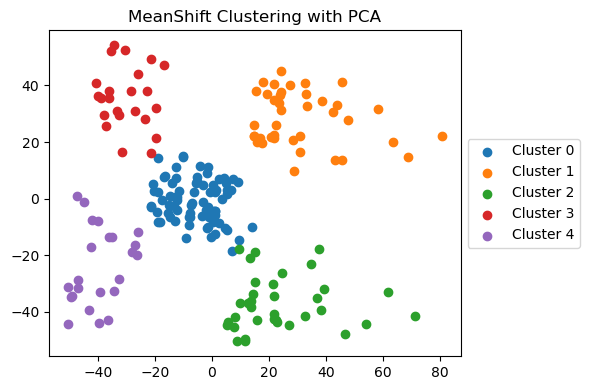

In [135]:
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in np.unique(labels_pca):
    cluster_indices = np.where(labels_pca == cluster_label)
    plt.scatter(pca_data[cluster_indices, 0], pca_data[cluster_indices, 1], label=f'Cluster {cluster_label}')


plt.title('MeanShift Clustering with PCA');

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


Calculating **Metrics**

In [136]:
silhouette = silhouette_score(pca_data, labels_pca)

calinski = calinski_harabasz_score(pca_data, labels_pca)

print(f"Silhouette score: {silhouette}")
print(f"\nCalinski-Harabasz score: {calinski}")

Silhouette score: 0.5593667916918542

Calinski-Harabasz score: 261.3175179393066


Adding the **Cluster** Column

In [137]:
df['mean_pca_Segment'] = labels_pca
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,...,dbscan_pca_Segment,dbscan_tsne_Segment,dbscan_umap_Segment,gmm_pca_Segment,gmm_tsne_Segment,gmm_umap_Segment,birch_pca_Segment,birch_tsne_Segment,birch_umap_Segment,mean_pca_Segment
0,19,15,39,0,1,3,4,4,1,4,...,0,0,0,4,4,0,4,0,4,4
1,21,15,81,0,1,5,0,2,3,3,...,4,1,1,3,0,3,3,3,5,3
2,20,16,6,1,0,3,4,4,1,4,...,1,2,2,4,4,0,4,0,4,4
3,23,16,77,1,0,5,0,2,3,3,...,2,3,3,3,0,3,3,3,5,3
4,31,17,40,1,0,3,4,4,1,4,...,1,2,2,4,4,0,4,0,4,4


### MeanShift with **t-SNE** 

Calculating the Optimal **Bandwidth** Value

In [155]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(df)

# Define the range of bandwidth values to try
bandwidth_range = np.arange(2,10,0.25)

# Initialize variables to store best results
best_bandwidth = None
best_score = -1

# Iterate over the bandwidth values and compute Calinski-Harabasz score
for bandwidth in bandwidth_range:
    ms = MeanShift(bandwidth=bandwidth)
    labels = ms.fit_predict(tsne_data)
    score = calinski_harabasz_score(tsne_data, labels)
    if score > best_score:
        best_score = score
        best_bandwidth = bandwidth

# Print the optimal bandwidth and the corresponding score
print("Optimal Bandwidth:", best_bandwidth)
print("Calinski-Harabasz Score:", best_score)


Optimal Bandwidth: 3.25
Calinski-Harabasz Score: 1324.1487778531532


Perform **MeanShift** Clustering

In [156]:
meanshift = MeanShift(bandwidth=3.25)
labels_tsne = meanshift.fit_predict(tsne_data)

Plotting the **Clusters**

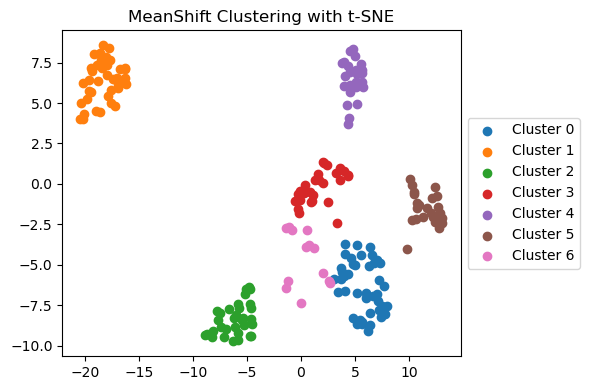

In [167]:
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in np.unique(labels_tsne):
    cluster_indices = np.where(labels_tsne == cluster_label)
    plt.scatter(tsne_data[cluster_indices, 0], tsne_data[cluster_indices, 1], label=f'Cluster {cluster_label}')


plt.title('MeanShift Clustering with t-SNE');

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


Calculating **Metrics**

In [158]:
silhouette = silhouette_score(tsne_data, labels_tsne)

calinski = calinski_harabasz_score(tsne_data, labels_tsne)

print(f"Silhouette score: {silhouette}")
print(f"\nCalinski-Harabasz score: {calinski}")

Silhouette score: 0.6622926592826843

Calinski-Harabasz score: 1324.1487778531532


Adding the **Cluster** Column 

In [159]:
df['mean_tsne_Segment'] = labels_tsne
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,...,dbscan_tsne_Segment,dbscan_umap_Segment,gmm_pca_Segment,gmm_tsne_Segment,gmm_umap_Segment,birch_pca_Segment,birch_tsne_Segment,birch_umap_Segment,mean_pca_Segment,mean_tsne_Segment
0,19,15,39,0,1,3,4,4,1,4,...,0,0,4,4,0,4,0,4,4,5
1,21,15,81,0,1,5,0,2,3,3,...,1,1,3,0,3,3,3,5,3,4
2,20,16,6,1,0,3,4,4,1,4,...,2,2,4,4,0,4,0,4,4,5
3,23,16,77,1,0,5,0,2,3,3,...,3,3,3,0,3,3,3,5,3,4
4,31,17,40,1,0,3,4,4,1,4,...,2,2,4,4,0,4,0,4,4,5


### MeanShift Clustering with **UMAP**

Calculating the Optimal Value of **Bandwidth**

In [160]:
umap = UMAP(n_components=2)
umao_data = umap.fit_transform(df)

# Define the range of bandwidth values to try
bandwidth_range = np.arange(1.5,10,0.5)

# Initialize variables to store best results
best_bandwidth = None
best_score = -1

# Iterate over the bandwidth values and compute Calinski-Harabasz score
for bandwidth in bandwidth_range:
    ms = MeanShift(bandwidth=bandwidth)
    labels = ms.fit_predict(umap_data)
    score = calinski_harabasz_score(umap_data, labels)
    if score > best_score:
        best_score = score
        best_bandwidth = bandwidth

# Print the optimal bandwidth and the corresponding score
print("Optimal Bandwidth:", best_bandwidth)
print("Calinski-Harabasz Score:", best_score)


Optimal Bandwidth: 1.5
Calinski-Harabasz Score: 5588.221513539041


Perfoming **MeanShift** Clustering

In [161]:
meanshift = MeanShift(bandwidth=1.5)
labels_umap = meanshift.fit_predict(umap_data)

Plotting the **Clusters**

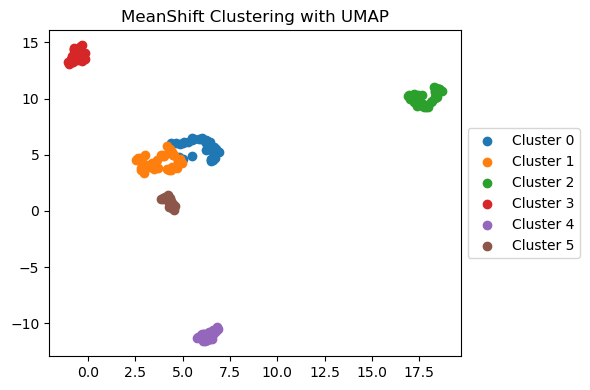

In [162]:
plt.figure(figsize=(6, 4))

# Plot the data points colored by the cluster labels
for cluster_label in np.unique(labels_umap):
    cluster_indices = np.where(labels_umap == cluster_label)
    plt.scatter(umap_data[cluster_indices, 0], umap_data[cluster_indices, 1], label=f'Cluster {cluster_label}')


plt.title('MeanShift Clustering with UMAP');

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


Calculating **Metrics**

In [163]:
silhouette = silhouette_score(umap_data, labels_umap)

calinski = calinski_harabasz_score(umap_data, labels_umap)

print(f"Silhouette score: {silhouette}")
print(f"\nCalinski-Harabasz score: {calinski}")

Silhouette score: 0.7533568739891052

Calinski-Harabasz score: 5588.221513539041


Adding the **Cluster** Column

In [164]:
df['mean_umap_Segment'] = labels_umap
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,...,dbscan_umap_Segment,gmm_pca_Segment,gmm_tsne_Segment,gmm_umap_Segment,birch_pca_Segment,birch_tsne_Segment,birch_umap_Segment,mean_pca_Segment,mean_tsne_Segment,mean_umap_Segment
0,19,15,39,0,1,3,4,4,1,4,...,0,4,4,0,4,0,4,4,5,5
1,21,15,81,0,1,5,0,2,3,3,...,1,3,0,3,3,3,5,3,4,4
2,20,16,6,1,0,3,4,4,1,4,...,2,4,4,0,4,0,4,4,5,5
3,23,16,77,1,0,5,0,2,3,3,...,3,3,0,3,3,3,5,3,4,4
4,31,17,40,1,0,3,4,4,1,4,...,2,4,4,0,4,0,4,4,5,5


**Writing** the DF to a CSV for furthur analysis

In [165]:
df.to_csv('segments.csv', index=False)

#### A Comparison of **Silhouette** Scores. It's important to note that your scores may differ from the ones listed below, however, the general order of accuracies should remain similar. 

| Model | Silhouette Score | Number of Clusters       |
| :----: | :---: | :---: |
| DBSCAN UMAP    | 0.8696766495704651  |    8    | 
| DBSCAN PCA     | 0.7615995482092686 |  6 with noise |
| MeanShift UMAP  |   0.7533568739891052   |  6 |
|   GMM UMAP   |  00.7197554111480713 |  6 |
|   Hierarchical UMAP  |   0.6939256   | 6 |
| K-Means UMAP  |   0.69301  | 6 |
|  GMM t-SNE   |  0.6842346787452698   |  6 |
|   DBSCAN t-SNE  |   0.6829977631568909   | 19 with noise |
|   Hierarchical t-SNE  |   0.68081635   |  6 |
|   Birch UMAP   |  0.6645039916038513   |  9 |
|   MeanShift t-SNE   |  0.6622926592826843   |  7  |
|   K-Means t-SNE  |  0.6621721   |  6 |
|   MeanShift PCA   |  0.5633708801852834  |  5 |
|   K-Means PCA   | 0.559366791691854  |  6  |
|   Birch PCA  | 0.5565267887505376 |  5  |
|  GMM PCA   | 0.5393760596011853 |  6  |
|   Hierarchical PCA   | 0.5341600115841181  |  6  |
|  Birch t-SNE  | 0.398579865694046 |  8  |


*Noise* refers to the 'Cluster = -1' from the cluster plot. Those data points aren't in an established cluster.

#### A Comparison of **Calinski-Harabasz** Scores. It's important to note that your scores may differ from the ones listed below, however, the general order of accuracies should remain similar. 

| Model | Calinski-Harabasz Score | Number of Clusters       |
| :----: | :---: | :---: |
| Birch UMAP    | 6863.350493258161  |    9    | 
| MeanShift UMAP   | 5588.221513539041 |  6 |
| Hierarchical UMAP  | 3873.875352516379   |  6 |
|  K-Means UMAP   |  3561.2696357212294 |  6 |
|   GMM UMAP  |  3329.33580793517   | 6 |
| DBSCAN UMAP  |  2147.5721870506422  | 8 |
|  MeanShift t-SNE | 1324.1487778531532  |  7 |
|  DBSCAN PCA  | 1872.0143945781135  |  6 with noise |
|  Hierarchical t-SNE |  1231.2338351573926   | 6 |
|   GMM t-SNE   |  1179.753525424784   |  6  |
|   K-Means t-SNE  |  1021.2419474077199  |  6  |
|  DBSCAN t-SNE | 601.3630425797178   |  19 with noise |
|   Birch t-SNE  | 509.35424629325956  |  8 |
|  MeanShift PCA  | 261.3175179393066  |  5  |
|   Birch PCA  | 256.9875275411812 |  5  |
|  K-Means PCA   | 243.4554482184861 |  6  |
|  GMM PCA   | 242.76352529968463 |  6  |
|  Hierarchical PCA  | 232.7131765800012|  6  |


## Observations

-UMAP is the best performing dimension reduction technique, then t-SNE then PCA

-There's a fair amount of differences in the ranking of Silhouette and Calinski-Harabasz scores

-Some of the models have too many clusters for realistic analysis

-DBSCAN had the best Silhouette scores

-MeanShift had the best Calinski-Harabasz scores

-MeanShift UMAP is the only model in the top 3 of both scores 

For my analysis, I will choose the model with the best combination of Silhouette score, Calinski-Harabasz score, and number of clusters. Having too many clusters will make it too difficult for the Marketing Team to create effective and relevant strategies. As a result, I will only recommend clusters with 6 or less clusters. Additionally, I want a model that has high scores in both the Silhouette and Calinski-Harabasz metrics. MeanShift UMAP is ranked 3rd in Silhouette scores and 2nd in Calinski-Harabasz scores. Therefore, I will recommend that the Marketing Team uses the MeanShift UMAP model to base its Marketing Strategy on. In the next file, (Data_Segmentation_Visuals) I will explore the characteristics of the different segments.